# Clustering

![](https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Clustering Problem

In [70]:
from sklearn.datasets import make_blobs

In [71]:
X, _ = make_blobs(random_state=11)

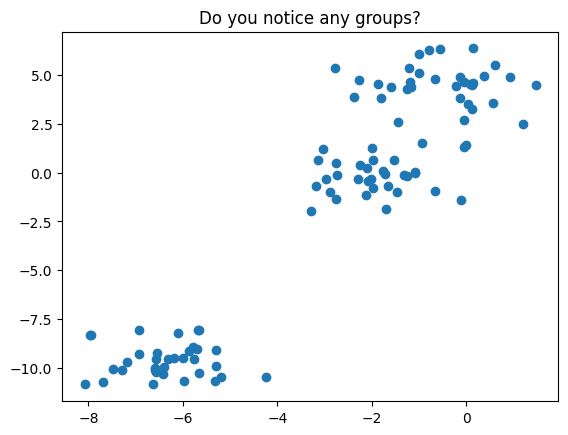

In [74]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Do you notice any groups?');

There are many clustering algorithms in sklearn -- let us use the KMeans and DBSCAN approach to cluster this data.

- [KMeans](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [75]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Setup a pipeline to fit the KMeans clustering model, fit it to the data and plot the resulting clusters.

- [KMeans docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### Evaluating Clusters

**Inertia**

Sum of squared differences between each point in a cluster and that cluster's centroid.

How dense is each cluster?

low inertia = dense cluster
ranges from 0 to very high values
$$ \sum_{j=0}^{n} (x_j - \mu_i)^2 $$
where $\mu_i$ is a cluster centroid

`.inertia_` is an attribute of a fitted sklearn's kmeans object

**Silhouette Score**

Tells you how much closer data points are to their own clusters than to the nearest neighbor cluster.

How far apart are the clusters?

ranges from -1 to 1
high silhouette score means the clusters are well separated
$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$
Where:

$a_i$ = Cohesion: Mean distance of points within a cluster from each other.

$b_i$ = Separation: Mean distance from point $x_i$ to all points in the next nearest cluster.
Use scikit-learn: `metrics.silhouette_score(X_scaled, labels)`.

Higher silhouette score is better!¶

### Hidden Markov Models











<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/HiddenMarkovModel.svg/600px-HiddenMarkovModel.svg.png />
</center>

In [ ]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

In [ ]:
btcn = yf.Ticker('BTC-USD')

In [ ]:
btcn = btcn.history()

In [ ]:
btcn.head()

In [ ]:
#plot it
btcn['Close'].plot()

### HMMLearn

We will use the `hmmlearn` library to implement our hidden markov model.  Here, we use the `GaussianHMM` class.  Depending on the nature of your data you may be interested in a different probability distribution.

- **HMM Learn**: [here](https://hmmlearn.readthedocs.io/en/latest/tutorial.html)

In [ ]:
#!pip install hmmlearn

In [ ]:
from hmmlearn import hmm

In [ ]:
#instantiate 
model = hmm.GaussianHMM(n_components=3)

In [ ]:
#fit
X = btcn['2021':][['Close']]

In [ ]:
X

In [ ]:
model.fit(X)

In [ ]:
#predict
model.predict(X)

In [ ]:
#look at our predictions
plt.plot(model.predict(X))

### Looking at Speech Files

For a deeper dive into HMM's for speech recognition please see Rabner's article A tutorial on hidden Markov models and selected applications in speech recognition [here](https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf).

In [ ]:
from scipy.io import wavfile

In [ ]:
!ls sounds/apple

In [ ]:
#read in the data and structure
rate, apple = wavfile.read('sounds/apple/apple01.wav')

In [ ]:
#plot the sound
plt.plot(apple)

In [ ]:
#look at another sample
rate, kiwi = wavfile.read('sounds/kiwi/kiwi01.wav')

In [ ]:
#kiwi's perhaps
plt.plot(kiwi)

In [ ]:
from IPython.display import Audio

In [ ]:
#take a listen to an apple
Audio('sounds/banana/banana02.wav')

### Generating Features from Audio: Mel Frequency Cepstral Coefficient

Big idea here is to extract the important elements that allow us to identify speech.  For more info on the MFCC, see [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/).

In [ ]:
!pip install python_speech_features

In [ ]:
import python_speech_features as features

#extract the mfcc features
mfcc_features = features.mfcc(kiwi)

#plot them
plt.plot(mfcc_features);

#determine our x and y
X = features.mfcc(kiwi)
y = ['kiwi']

In [ ]:
import os

In [ ]:
#make a custom markov class to return scores
class MakeMarkov:
    
    def __init__(self, n_components = 3):
        self.components = n_components
        self.model = hmm.GaussianHMM(n_components=self.components)
        
    def fit(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        self.score = self.fit_model.score(X)
        return self.score
        
    

In [ ]:
kiwi_model = MakeMarkov()
kiwi_model.fit(X)
kiwi_model.score(X)

In [ ]:
hmm_models = []
labels = []
for file in os.listdir('sounds'):
    sounds = os.listdir(f'sounds/{file}')
    sound_files = [f'sounds/{file}/{sound}' for sound in sounds]
    for sound in sound_files[:-1]:
        rate, data = wavfile.read(sound)
        X = features.mfcc(data)
        mmodel = MakeMarkov()
        mmodel.fit(X)
        hmm_models.append(mmodel)
        labels.append(file)



In [ ]:
#write a loop that bops over the files and prints the label based on
#highest score



### Making Predictions

Now that we have our models, given a new sound we want to score these based on what we've learned and select the most likely example.

In [ ]:
in_files = ['sounds/pineapple/pineapple15.wav',
           'sounds/orange/orange15.wav',
           'sounds/apple/apple15.wav',
           'sounds/kiwi/kiwi15.wav']

### Further Reading

- **Textbook**: Marsland's *Machine Learning: An Algorithmic Perspective* has a great overview of HMM's.
- **Time Series Examples**: Checkout Aileen Nielsen's tutorial from [SciPy 2019](https://www.youtube.com/watch?v=v5ijNXvlC5A) and her book *Practical Time Series Analysis*
- **Speech Recognition**: Rabiner's [*A tutorial on hidden Markov models and selected applications in speech recognition*]('readings/rabiner.pdf')
- **HMM;s and Dynamic Programming**: Avik Das' PyData Talk [*Dynamic Programming for Machine Learning: Hidden Markov Models*](https://www.youtube.com/watch?v=MADX-L75ub8)